# Project Assignment # 2

For this project we are going to work on a Convolutional Neural Network (CNN) for image classification using the dataset [CIFAR_10](http://www.cs.toronto.edu/~kriz/cifar.html).

## Part 1: Baseline Implementation of the workflor for CIFAR-10 image classification

### Data Preparation

In [1]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [2]:
train_images.shape

(50000, 32, 32, 3)

In [3]:
test_images.shape

(10000, 32, 32, 3)

In [4]:
train_labels.shape

(50000, 1)

In [5]:
test_labels.shape

(10000, 1)

In [6]:
train_labels[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

The dataset contains 50,000 images for training and 10,000 images for testing. In total the dataset contains 60,000 images of 32x32 RGB. The labels are 10 different classes. This means that we are going to work in a multi-class classification problem where we want to know to which of the 10 different classes corresponds each image in the dataset.

The 10 different classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Let's take a look at the 5 first images in the training and testing set with the corresponding class label:

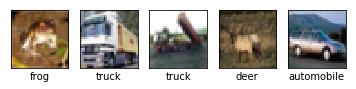

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure() #(figsize=(xx, xx))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.imshow(train_images[i])
    ax.set_xlabel(class_names[train_labels[i][0]]) #,fontsize=xx
plt.show()

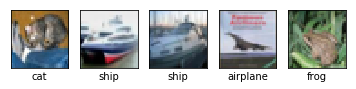

In [10]:
fig = plt.figure() #(figsize=(xx, xx))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.imshow(test_images[i])
    ax.set_xlabel(class_names[test_labels[i][0]]) #,fontsize=xx
plt.show()

We can observe the different classes of images the dataset has. According to the [source](http://www.cs.toronto.edu/~kriz/cifar.html) there are 5,000 images of each of the 10 classes in the training set and 1,000 images of each class in the testing set.

A common practice in the preparation of the data is to normalize all images pixels to the range of 0-1. Another practice is to transform the target into a categorical one-hot vector. In this case, it will be a one-hot vector of shape 10.

In [11]:
from tensorflow.keras.utils import to_categorical
#to_categorical!?
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Model Selection

We are going to build a CNN model with the following structure:
   * Three Convolutional layers (16, 32, 64) with 3x3 filters, Relu activations, and same padding.
   * One MaxPooling layer for each Convolutional layer with a pool size of 2x2 and a stride of 2.
   * One Fully Connected layer with 1024 neurons.

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2))) # stride of 2, default to pool_size parameter (in this case: 2)
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

To begin, the parameters we will use to compile the model are: 
- Optimizer: `rmsprop`
- Loss: `categorical_crossentropy` (because of our categorical target)
- Metrics: `accuracy`

In [14]:
#from tensorflow.keras import optimizers

model.compile(optimizer = 'rmsprop', #optimizers.RMSprop(lr=2e-5)
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

Before training the model, we would like to test it using the first image in the testing set. The idea is to print out the predicted probability for each of the 10 classes, and find the categorical cross entropy loss of the untrained model for this image. In theory, the result should be approximately `log(C)`

In [15]:
# Define the test sample
test_sample = test_images[0]
test_sample = test_sample.reshape((1, 32, 32, 3))

# Predict the probability for each class
y_pred = model.predict(test_sample)
print(y_pred)

[[0.1044353  0.09993476 0.09067885 0.10037376 0.09482088 0.09636267
  0.10771547 0.10687099 0.09597851 0.10282883]]


In [16]:
# Defining true label
y_true = test_labels[0]
y_true

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
# Calculating the categorical cross entropy loss
from tensorflow.keras import losses

loss_first_test_image = losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)
print(loss_first_test_image)


tf.Tensor([2.2988544], shape=(1,), dtype=float32)


In [18]:
import numpy as np

np.log(10)

2.302585092994046

As a result, we can see that the categorical cross entropy loss is close to `log(10)`. This result is because an untrained model is going to assign random probabilities for all classes.

### Model training

To start, we are going to use 20 epochs and default hyperparameter values to train our model.

In [19]:
history = model.fit(train_images,
                    train_labels,
                    epochs=20, # batch_size: default = 32
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 75s 1ms/sample - loss: 1.3976 - accuracy: 0.4982 - val_loss: 1.1235 - val_accuracy: 0.5940
Epoch 2/20
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.0131 - accuracy: 0.6408 - val_loss: 1.0530 - val_accuracy: 0.6276
Epoch 3/20
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.8682 - accuracy: 0.7001 - val_loss: 0.9258 - val_accuracy: 0.6698
Epoch 4/20
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.7874 - accuracy: 0.7305 - val_loss: 0.9602 - val_accuracy: 0.6722
Epoch 5/20
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.7360 - accuracy: 0.7480 - val_loss: 0.9374 - val_accuracy: 0.6919
Epoch 6/20
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.7024 - accuracy: 0.7625 - val_loss: 0.9354 - val_accuracy: 0.7101
Epoch 7/20
50000/50000 [==============================] 

Saving the model is a good practice

In [20]:
model.save('cifar10_1.h5')

Let's display the loss and accuracy curves for the training and validation sets

In [21]:
history.history.keys()

dict_keys(['accuracy', 'val_accuracy', 'val_loss', 'loss'])

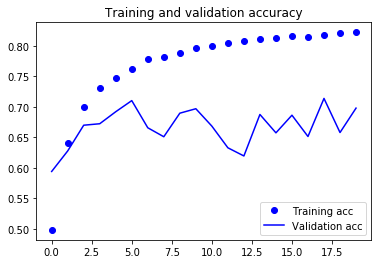

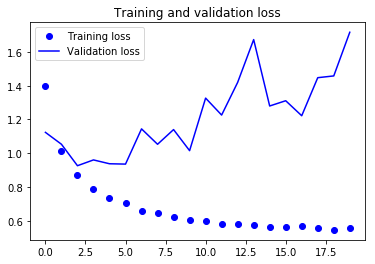

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see how our model overfits. Our model starts overfitting after around 2 epochs. The training accuracy increases over time up to 0.82, on the other hand, the validation accuracy oscillates between 0.62 to 0.70. In addition, we can see that the loss validation reaches a minimum by the 2 epoch, while the training loss keeps decreasing until it gets to around 0.5.

### Model Evaluation

Now, we are going to evaluate the performance of our trained model in our testing set.

In [23]:
scores = model.evaluate(test_images, test_labels)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

10000/10000 [==============================] - 5s 458us/sample - loss: 1.7165 - accuracy: 0.6978
Test loss:  1.7165098515987396
Test accuracy:  0.6978


The accuracy we get in the test set is 70%. We definitely can try to get a better predicition after doing some changes and regularizing our model.

### Prediction

Next, we will repeat the example done in the model selection section, where we selected the first image in the testing set, predicted the probability for each of the classes, and calculated the categorical cross entropy loss, but now we a trained model.

In [24]:
# Define the test sample
test_sample2 = test_images[0]
test_sample2 = test_sample2.reshape((1, 32, 32, 3))

# Predict the probability for each class
y_pred2 = model.predict(test_sample2)
print(y_pred2)

[[5.6128759e-08 7.6131396e-10 1.2279681e-07 4.9490002e-01 8.1219670e-11
  5.0503081e-01 6.8867899e-05 1.5357690e-08 1.5663939e-08 1.9393733e-08]]


In [25]:
y_pred2[0][3] # Cat

0.49490002

In [26]:
y_pred2[0][5] # Dog

0.5050308

The highest probability values are in the third and fifth class. In other words the model is telling us that it can be either a cat or a dog, but according to it, it is more likely to be a dog than a cat.

In [27]:
# Defining true label
y_true = test_labels[0]
y_true

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

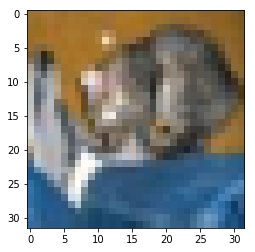

In [28]:
plt.imshow(test_images[0])
plt.show()

The ground truth is that the image is actually a cat, so our model did not predict correctly.

In [29]:
# Calculating the categorical cross entropy loss
loss_first_test_image2 = losses.categorical_crossentropy(y_true, y_pred2, from_logits=False, label_smoothing=0)
print(loss_first_test_image2)

tf.Tensor([0.7033995], shape=(1,), dtype=float32)


The categorical crossentropy loss changed from approximately log(10) to 0.70 because we have a trained model.

## Part 2: Additional functionalities

### Accuracy analysis

In order to have a better understanding of our results, we are going to create a confusion table for the model testing. The columns of the table are going to be the model output labels, and the rows the ground truth labels.

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

# We need to transform our one hot vectors to a integer
# Prediction
test_pred = model.predict(test_images)
index_test_pred = np.argmax(test_pred, axis=1)

# True
index_test_true = np.argmax(test_labels, axis=1)

# Confusion Matrix
print("              Confusion Matrix\n")
print(confusion_matrix(index_test_true, index_test_pred))

              Confusion Matrix

[[764  20  75  15   8  14  11   2  59  32]
 [ 21 822   8  15   0  10   8   1  28  87]
 [ 74  10 691  55  22  82  37  12   8   9]
 [ 39   9 104 496  23 242  51  10   8  18]
 [ 45   7 180  70 501  87  48  53   4   5]
 [ 17   8  62 130  18 710  23  13   8  11]
 [  7   8  80  75  11  59 744   2   5   9]
 [ 31   9  83  51  29 124  10 632   0  31]
 [ 77  26  29  14   2   5   8   0 814  25]
 [ 40  71  13  18   2  20   4   5  23 804]]


After seeing the confusion matrix, we can say that in most cases the model predict the correct classification, however, there are many missclassified predictions. For instance, the model confuses dogs and cats, it missclassifies 242 cats as dogs, and 130 dogs as cats. That's a lot!

We can also build a Classification report to keep looking how accurate were our predictions

In [84]:
# Classification report
print(classification_report(index_test_true, index_test_pred, target_names=class_names))

             precision    recall  f1-score   support

   airplane       0.69      0.76      0.72      1000
 automobile       0.83      0.82      0.83      1000
       bird       0.52      0.69      0.59      1000
        cat       0.53      0.50      0.51      1000
       deer       0.81      0.50      0.62      1000
        dog       0.52      0.71      0.60      1000
       frog       0.79      0.74      0.77      1000
      horse       0.87      0.63      0.73      1000
       ship       0.85      0.81      0.83      1000
      truck       0.78      0.80      0.79      1000

avg / total       0.72      0.70      0.70     10000



The precision is on average 72%

### Model visualization

Now, we are going to take a look to that convolutional layers learn. Specifically, how the featured maps and filters look. We will begin with the filters for the first convolutional layer:

#### Filter Visualization

In [85]:
from keras import backend as K

layer_name = 'conv2d'
filter_index = 0

Using TensorFlow backend.


In [86]:
# Utility function to convert a tensor into a valid image
def deprocess_image(x):
    x -= x.mean()          #
    x /= (x.std() + 1e-5)  # Normalizes the tensor:
    x *= 0.1               #      centers on 0, ensures that std is 0.1
    
    x += 0.5               # Clips to [0,1]
    x = np.clip(x, 0, 1)   #
    
    x *= 255                                #
    x = np.clip(x, 0, 255).astype('uint8')  # Converts to an RGB array
    return x

In [87]:
# Function to generate filter visualizations
def generate_pattern(layer_name, filter_index, size=32):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

Let's print the first filter of the first convolutional layer

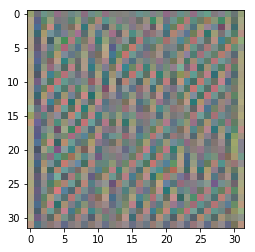

In [88]:
plt.imshow(generate_pattern(layer_name, filter_index))
plt.show()

This is one of the patterns the filters are using.

This is how the 16 filters of the first convolutional layer look like:

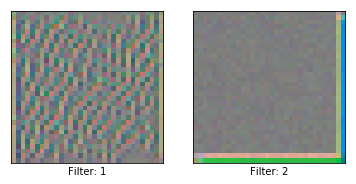

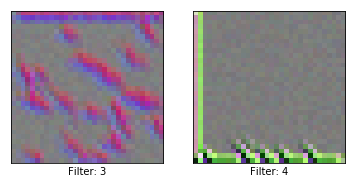

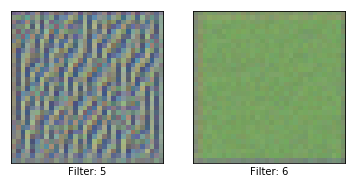

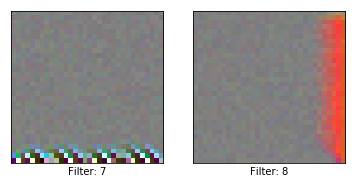

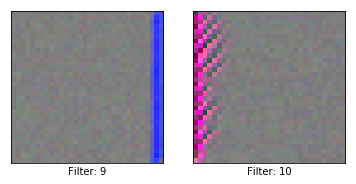

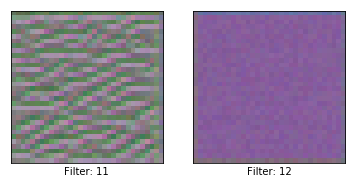

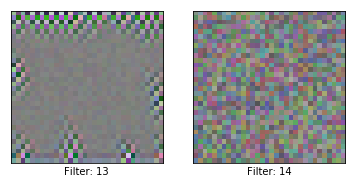

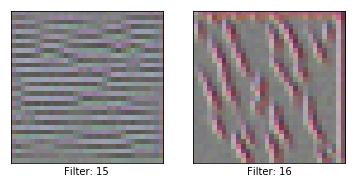

In [114]:
for j in range(0, 15, 2):
    fig = plt.figure()
    for i in range(1,3):
        image_number = (i - 1) + j
        filter_number = image_number + 1
        ax = fig.add_subplot(1, 2, i)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)
        ax.set_xlabel(("Filter: {}".format(filter_number)))
        ax.imshow(generate_pattern(layer_name, image_number))    
plt.show()

We can see the different patterns for each of the filters in the first convolution layer

#### Feature maps

For the first testing image, we will display the 16 feature maps:

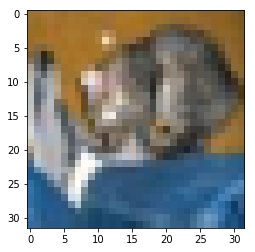

In [115]:
# first testing image
plt.imshow(test_images[0])
plt.show()

In [121]:
from tensorflow.keras import models

# Extracts the outputs of the layers
layer_outputs = [layer.output for layer in model.layers[:6]]

# Creating a model that its input is the previous model inputs and 
# returns the layer outputs.
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Creates a list with an array per layer activation
activations = activation_model.predict(test_sample)

# Activation of the first convolutional layer for our cat image
first_layer_activation = activations[0]

print(first_layer_activation.shape)

(1, 32, 32, 16)


This is the same output shape for the first convolutional layer as in the previous model. It is a 32x32 feature map with 16 channels. For instance, we can visualize the first channel:

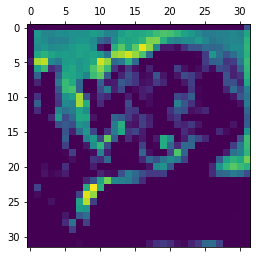

In [140]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.show()

This channel seems to encode the form of a cat.

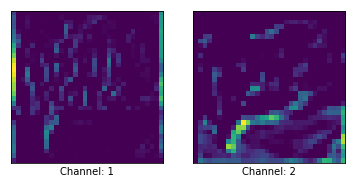

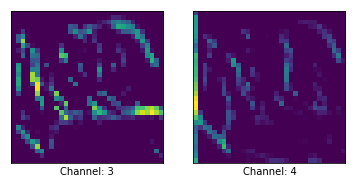

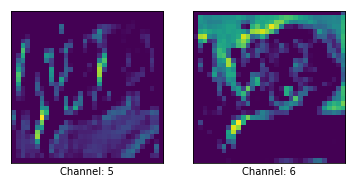

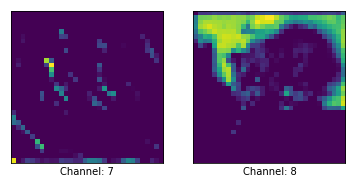

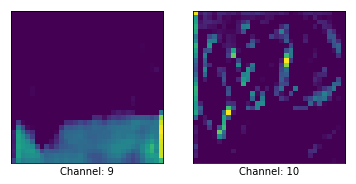

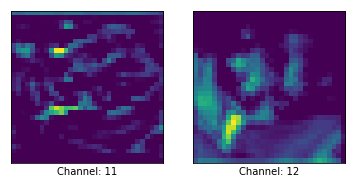

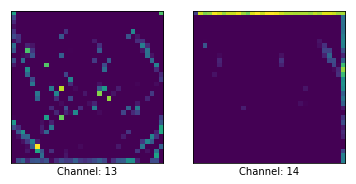

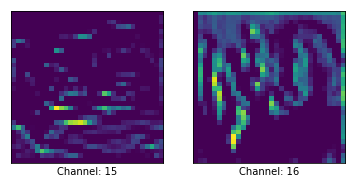

In [125]:
# All channels
for j in range(0, 15, 2):
    fig = plt.figure()
    for i in range(1,3):
        image_number = (i - 1) + j
        channel_number = image_number + 1
        ax = fig.add_subplot(1, 2, i)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)
        ax.set_xlabel(("Channel: {}".format(channel_number)))
        ax.imshow(first_layer_activation[0, :, :, image_number])  
plt.show()

This first convolution layer finds different edges or forms in the picture. It is trying to find out what it can find in the picture.

### Overfitting observation

Using a small set of training images (100), we will run the same implementation as in Part 1, and we will plot the training and validation loss curves.

In [126]:
# Separating a small data set from the original one
small_train_images = train_images[:100]
small_train_labels = train_labels[:100]

small_test_images = test_images[:100]
small_test_labels = test_labels[:100]

In [127]:
# Using the same implementation
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [129]:
history = model.fit(small_train_images,
                    small_train_labels,
                    epochs=20, # batch_size: default = 32
                    validation_data=(small_test_images, small_test_labels))

Train on 100 samples, validate on 100 samples
Epoch 1/20
100/100 [==============================] - 1s 9ms/sample - loss: 2.3832 - accuracy: 0.2000 - val_loss: 2.5649 - val_accuracy: 0.0600
Epoch 2/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.2844 - accuracy: 0.1100 - val_loss: 2.3217 - val_accuracy: 0.1100
Epoch 3/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.2302 - accuracy: 0.2300 - val_loss: 2.4370 - val_accuracy: 0.0700
Epoch 4/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.1453 - accuracy: 0.1900 - val_loss: 2.3760 - val_accuracy: 0.1400
Epoch 5/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.1217 - accuracy: 0.2500 - val_loss: 3.2105 - val_accuracy: 0.1000
Epoch 6/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.0993 - accuracy: 0.3300 - val_loss: 2.8084 - val_accuracy: 0.1000
Epoch 7/20
100/100 [==============================] - 0s 2ms/sample - loss: 1.9055 - accur

In [132]:
model.save('cifar10_small_set_1.h5')

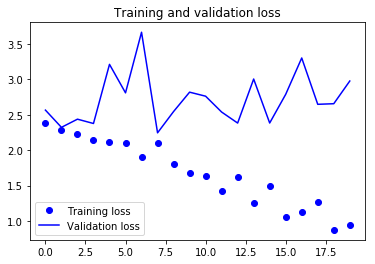

In [136]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After seeing the graph, we notice that it takes around 3 epochs for the model to overfit. We can see how the validation loss reaches a minimum at the 2 epoch, but the training loss keeps going down until it gets to 0.9. 

One of the options to fight overfitting is adding drop out layers after the dense layers, we will do that:

In [133]:
# Using the same implementation with dropout layers
dpt_model = models.Sequential()
dpt_model.add(layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
dpt_model.add(layers.MaxPooling2D((2, 2)))
dpt_model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
dpt_model.add(layers.MaxPooling2D((2, 2)))
dpt_model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
dpt_model.add(layers.MaxPooling2D((2, 2)))

dpt_model.add(layers.Flatten())
dpt_model.add(layers.Dense(1024, activation = 'relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(10, activation = 'softmax'))

dpt_model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [135]:
dpt_model_history = dpt_model.fit(small_train_images,
                    small_train_labels,
                    epochs=20, # batch_size: default = 32
                    validation_data=(small_test_images, small_test_labels))

Train on 100 samples, validate on 100 samples
Epoch 1/20
100/100 [==============================] - 1s 9ms/sample - loss: 2.2944 - accuracy: 0.1500 - val_loss: 2.5512 - val_accuracy: 0.0800
Epoch 2/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.2880 - accuracy: 0.1000 - val_loss: 2.4232 - val_accuracy: 0.0600
Epoch 3/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.2373 - accuracy: 0.1700 - val_loss: 2.3243 - val_accuracy: 0.1600
Epoch 4/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.2197 - accuracy: 0.2300 - val_loss: 2.3912 - val_accuracy: 0.0600
Epoch 5/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.1733 - accuracy: 0.2200 - val_loss: 2.2798 - val_accuracy: 0.1200
Epoch 6/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.1654 - accuracy: 0.3400 - val_loss: 2.3654 - val_accuracy: 0.1200
Epoch 7/20
100/100 [==============================] - 0s 2ms/sample - loss: 2.0891 - accur

In [138]:
model.save('cifar10_dpt_small_set_1.h5')

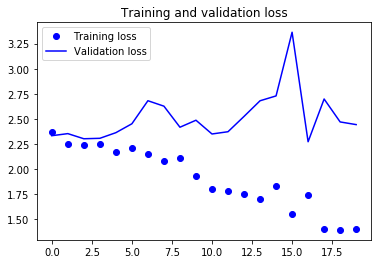

In [10]:
import matplotlib.pyplot as plt

dpt_model_loss = dpt_model_history.history['loss']
dpt_model_val_loss = dpt_model_history.history['val_loss']

epochs = range(len(dpt_model_loss))

plt.figure()

plt.plot(epochs, dpt_model_loss, 'bo', label='Training loss')
plt.plot(epochs, dpt_model_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The dropout layer reduced the variation of the training loss for the first epochs. It reduced overfitting. Nevertheless, it does not make a big difference from our previous model. If we compare the results from both models, we can see that the training loss increased from 0.9453 to 1.1944 and the validation loss decreased from 2.9755 to 2.7631. We can say that the model generalize a bit better but it does not optimize a bit better. Other options to reduce overfitting might help us get better results.

## Part 3: Model and training fine-tuning

In [1]:
# Importing our libraries needed to build our model, and plot results
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.activations import relu
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras.optimizers import SGD, Adam
print('done')

done


In [2]:
# Importing cifar-10 dataset and normalizing images to 0-1
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0
print('done')

done


One option to reduce overfitting is doing Data Augmentation. When we do this process, we generate new images based on the ones we have in our training set, so that we have more training data. Let's create some new images:

In [5]:
# Data generation/augmentation
datagen = idg(rotation_range=15, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(train_images)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

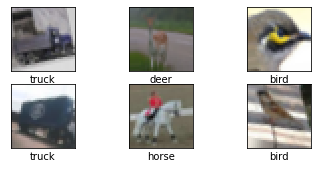

In [6]:
# Displaying 6 newly generated images
fig = plt.figure()
for train_batch, labels_batch in datagen.flow(train_images, train_labels, batch_size=9):
    for i in range(6):
        ax = fig.add_subplot(3, 3, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)
        ax.imshow(train_batch[i])
        ax.set_xlabel(class_names[labels_batch[i][0]])
    plt.show()
    break

The new images we created have changed from the original versions in the following aspects: rotation range, horizontal flip, width shift range, and height shift range. There are more aspects we can change to the images, but those are good for now.

#### Modifying training hyperparameters

Let's change some of the hyperparameters for our new mode. These are not the only values we tried. Among the ones we changed are: `epochs`, `batch size`, `steps`, `activations`, `learning rate`, `optimizer`, and `decay function`.

In [7]:
# Modifying the training hyperparameters
from tensorflow.keras.optimizers.schedules import PolynomialDecay, ExponentialDecay, InverseTimeDecay
filter_size = (3, 3)
pooling_size = (2, 2)
reg = None
num_epochs = 100
bs = 256
num_step = num_epochs*50000/bs
ac = 'relu'
learning_rate1 = ExponentialDecay(initial_learning_rate=0.1, decay_steps=num_step, decay_rate=0.8)
learning_rate2 = ExponentialDecay(initial_learning_rate=0.1, decay_steps=num_step, decay_rate=0.5)
adm=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print('done')

done


#### Modifying the model architecture parameters

In the previous cell, `filter size`, `pooling size` and reg, that stands for `kernel regularizer`, are model architecture parameters. We kept the same values as before for the three mentioned parameters, so as the `strides` default for the MaxPooling Layers. Instead of using kernel regularizer, we are going to use `Dropout layers` to reduce overfitting. In Addition, we will use `Batch Normalization layers` after each Convolution layer.

In [8]:
# Modifying model architecture parameters
model = models.Sequential()

model.add(layers.Conv2D(32, filter_size, activation='relu', input_shape=(32,32,3), kernel_regularizer=reg, padding='same'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(32, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pooling_size))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(64, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pooling_size))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(128, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pooling_size))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.0))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=adm, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
print('done')

done


For this model, instead of converting the targets to one-hot vectors and using categorical cross entropy, we used `Sparse Categorical Cross Entropy` at compilation time.

#### Training without Data Augmentation

After modifying the parameters and hyperparameters, we decided to give it a try and train our model without Data Augmentation. Later on we will see if this makes a difference to the results

In [10]:
hisotry = model.fit(train_images, train_labels, 
                    epochs=100, 
                    batch_size=bs, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 44s 880us/sample - loss: 2.0673 - accuracy: 0.3914 - val_loss: 2.3191 - val_accuracy: 0.1025
Epoch 2/100
50000/50000 [==============================] - 41s 830us/sample - loss: 1.9689 - accuracy: 0.4931 - val_loss: 2.2462 - val_accuracy: 0.2012
Epoch 3/100
50000/50000 [==============================] - 42s 832us/sample - loss: 1.9229 - accuracy: 0.5389 - val_loss: 2.0472 - val_accuracy: 0.4072
Epoch 4/100
50000/50000 [==============================] - 42s 830us/sample - loss: 1.8889 - accuracy: 0.5738 - val_loss: 1.9257 - val_accuracy: 0.5326
Epoch 5/100
50000/50000 [==============================] - 41s 829us/sample - loss: 1.8626 - accuracy: 0.6001 - val_loss: 1.8616 - val_accuracy: 0.5979
Epoch 6/100
50000/50000 [==============================] - 42s 830us/sample - loss: 1.8432 - accuracy: 0.6204 - val_loss: 1.8746 - val_accuracy: 0.5880
Epoch 7/100
50000/50000 [=============

The accuracy of our model is around 0.95! and our validation accuracy is around 0.83! The accuracy has improved from 0.82 to 0.95, and the validation accuracy has improved from 0.70 to 0.83. These could be consider pretty decent results.

In [11]:
model.save('project_2_1.h5')

#### Training with Data Augmentation

We will train our model with Data Augmentation. Based on results we got, we decided to only keep a Dropout layer after the Dense Layer.

In [12]:
# New model Architecture
model2 = models.Sequential()

model2.add(layers.Conv2D(32, filter_size, activation='relu', input_shape=(32,32,3), kernel_regularizer=reg, padding='same'))
model2.add(layers.BatchNormalization(axis=-1))
model2.add(layers.Conv2D(32, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model2.add(layers.BatchNormalization(axis=-1))
model2.add(layers.MaxPooling2D(pooling_size))
model2.add(layers.Dropout(0))

model2.add(layers.Conv2D(64, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model2.add(layers.BatchNormalization(axis=-1))
model2.add(layers.Conv2D(64, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model2.add(layers.BatchNormalization(axis=-1))
model2.add(layers.MaxPooling2D(pooling_size))
model2.add(layers.Dropout(0))

model2.add(layers.Conv2D(128, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model2.add(layers.BatchNormalization(axis=-1))
model2.add(layers.Conv2D(128, filter_size, activation='relu', kernel_regularizer=reg, padding='same'))
model2.add(layers.BatchNormalization(axis=-1))
model2.add(layers.MaxPooling2D(pooling_size))
model2.add(layers.Dropout(0))

model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))
model2.compile(optimizer=adm, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
print('done')

done


In [14]:
# Training with new images
history2 = model2.fit_generator(datagen.flow(train_images, train_labels, batch_size=128),
                               epochs=100, 
                               steps_per_epoch=len(train_images)//128, 
                              verbose=1,
                              validation_data=(test_images, test_labels))

Epoch 1/100
390/390 [==============================] - 97s 249ms/step - loss: 2.0062 - accuracy: 0.4517 - val_loss: 2.2058 - val_accuracy: 0.2384
Epoch 2/100
390/390 [==============================] - 96s 245ms/step - loss: 1.9093 - accuracy: 0.5523 - val_loss: 1.8715 - val_accuracy: 0.5932
Epoch 3/100
390/390 [==============================] - 96s 246ms/step - loss: 1.8687 - accuracy: 0.5935 - val_loss: 1.8420 - val_accuracy: 0.6182
Epoch 4/100
390/390 [==============================] - 96s 246ms/step - loss: 1.8390 - accuracy: 0.6240 - val_loss: 1.8353 - val_accuracy: 0.6266
Epoch 5/100
390/390 [==============================] - 95s 244ms/step - loss: 1.8198 - accuracy: 0.6423 - val_loss: 1.8273 - val_accuracy: 0.6358
Epoch 6/100
390/390 [==============================] - 96s 246ms/step - loss: 1.8073 - accuracy: 0.6555 - val_loss: 1.7772 - val_accuracy: 0.6858
Epoch 7/100
390/390 [==============================] - 96s 245ms/step - loss: 1.7923 - accuracy: 0.6716 - val_loss: 1.7848 -

The validation accuracy have increased to 0.85

In [15]:
model.save('project_2_2.h5')

#### Summary of first model

In [16]:
# Model without data augmentation
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

#### Summary of second model

In [17]:
# Model with data augmentation
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

#### Model Evaluation

10000/1 - 5s - loss: 1.6268 - accuracy: 0.8339


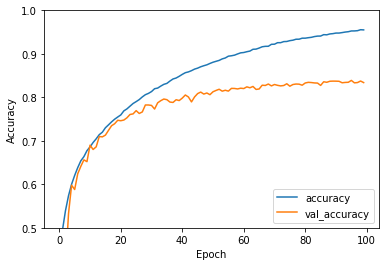

In [19]:
history = hisotry
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 4s - loss: 1.6001 - accuracy: 0.8498


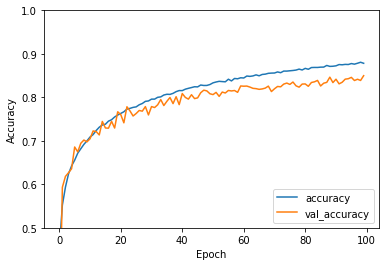

In [21]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_accuracy = model2.evaluate(test_images, test_labels, verbose=2)

We have reduced the problem of overfitting with our new parameters, hyperparameters and model architecture. When we include data augmentation, we get our best performance. Our test accuracy without data augmentation is 0.8339, and with data augmentation is 0.8498. One important thing to mention is that there is a tradeoff for getting a better testing accuracy. Even though we are getting a better testing accuracy, and the curves look closer to each other, when we include data augmentation the accuracy reduces from around 0.95 to 0.87, as we can see in the curves.